In [1]:
import pandas as pd
import numpy as np

In [2]:
lp = pd.read_csv("flipkart data/flipkart_laptops.csv")
mb = pd.read_csv("flipkart data/flipkart_mobiles.csv")
ref = pd.read_csv("flipkart data/flipkart_refrigerator.csv")
sm = pd.read_csv("flipkart data/flipkart_smart_watch.csv")
tv = pd.read_csv("flipkart data/flipkart_tv.csv")
wm = pd.read_csv("flipkart data/flipkart_washing_machine.csv")

In [3]:
char_remov = ['% off', ' Ra', ' R','t','i']
datas=[wm,ref,sm,tv,lp,mb]
for i in datas:
    i['Discount']=i['Discount'].str.replace('% off','')
    i['Discount']=i['Discount'].astype('int')
    i['No_of_ratings']=i['No_of_ratings'].str[0:7]
    i['No_of_ratings']=i['No_of_ratings'].str.replace(' Ra' ,'')
    i['No_of_ratings']=i['No_of_ratings'].str.replace(' R' ,'')
    i['No_of_ratings']=i['No_of_ratings'].str.replace('t' ,'')
    i['No_of_ratings']=i['No_of_ratings'].str.replace('i' ,'')
    i['No_of_ratings']=i['No_of_ratings'].str.replace('n' ,'')
    i['No_of_ratings']=i['No_of_ratings'].astype('int')

# Smartwatch Analysis

In [4]:
Top5smw=pd.pivot_table(sm,index='Name',values=['Ratings','No_of_ratings'])
Top5smw=Top5smw.sort_values(by=['No_of_ratings'],ascending=False)
Top5smw=Top5smw[Top5smw['Ratings']>4.1].head()
Top5smw

,No_of_ratings,Ratings
Name,,
"Noise ColorFit Caliber Smart Watch with 15-day battery 1.69"" display 60 Sports Modes Smartwatch",243784,4.2
"Noise Icon Buzz BT Calling with 1.69"" display AI Voice Assistance Built-In Games Smartwatch",169101,4.2
DIZO Watch 2 (by realme TechLife),107247,4.2
DIZO Watch 2 Sports (by realme TechLife),60177,4.2
APPLE Watch Series 3 (GPS 38mm) - Space Grey Aluminium Case with Black Sport Band,55302,4.6


In [5]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
pip install -U plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 500
png_renderer.height = 500
import kaleido

In [9]:
import plotly.express as px 

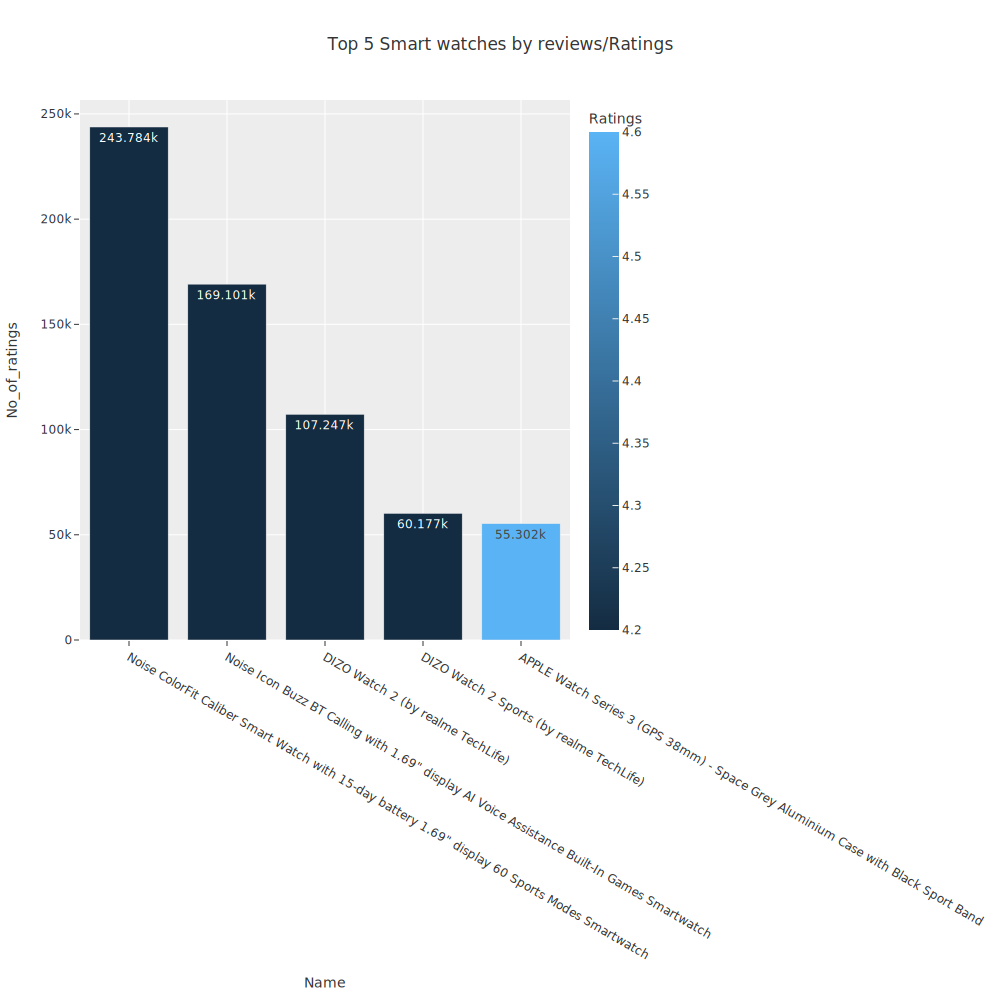

In [10]:
fig1=px.bar(Top5smw,y='No_of_ratings',color='Ratings',height=1000,width=1000,template='ggplot2',title="Top 5 Smart watches by reviews/Ratings",text_auto=True)
fig1.show(renderer="svg")

In [11]:
dissmw=pd.pivot_table(sm,index='Name',values=['Discount'])
dissmw=dissmw.sort_values(by=['Discount'],ascending=False)
dissmw=dissmw.head(5)
dissmw

,Discount
Name,
FitPro SMART T55 CALLING WATCH WITH 44MM BRIGHT DISPLAY AND 2 TYPE OF STRAP Smartwatch,86.0
FitPro T55 Series 7 Smart Watch Enabled with Bluetooth Calling and Fitness Tracker Smartwatch,85.0
"Fire-Boltt Epic Plus with1.83"" 2.5D Curved GlassSPO2 Heart Rate tracking Touchscreen Smartwatch",85.0
Zwero T55 Series 6 Smart Watch Enabled with Bluetooth Calling and Fitness Tracker Smartwatch,84.0
THE MOBILE POINT Bluetooth Fitness Smart Watch Smartwatch,84.0


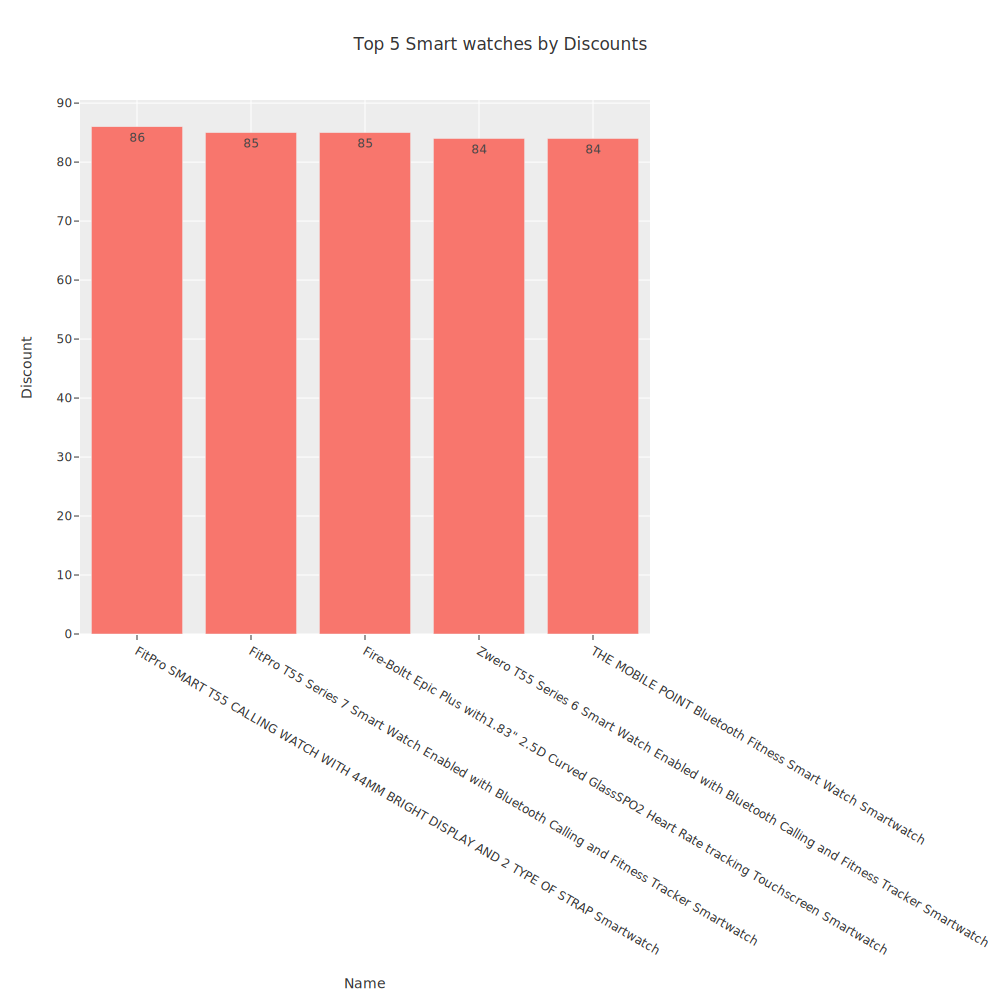

In [12]:
fig2=px.bar(dissmw,y='Discount',height=1000,width=1000,template='ggplot2',title="Top 5 Smart watches by Discounts",text_auto=True)
fig2.show(renderer="svg")

In [13]:
brandsmw=pd.pivot_table(sm,index='Brand',values=['Ratings','No_of_ratings'])
brandsmw=brandsmw.sort_values(by=['Ratings'],ascending=False,)
brandsmw=brandsmw[brandsmw['No_of_ratings']>10000].head(5)
brandsmw

,No_of_ratings,Ratings
Brand,,
APPLE,10623.285714,4.557143
Boult,37276.000000,4.300000
Ambrane,35365.000000,4.200000
Noise,38490.782609,4.134783
realme,30024.333333,4.133333


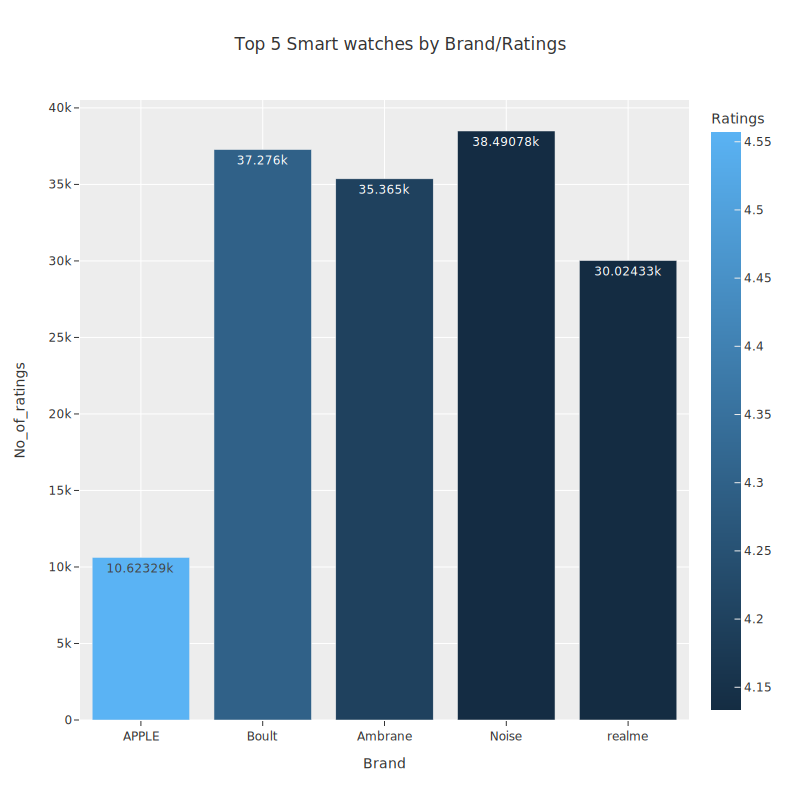

In [14]:
fig3=px.bar(brandsmw,y='No_of_ratings',color='Ratings',height=800,width=800,template='ggplot2',title="Top 5 Smart watches by Brand/Ratings",text_auto=True)
fig3.show(renderer="svg")

In [15]:
exsmw=pd.pivot_table(sm,index='Brand',values=['Selling Price'])
exsmw=exsmw.sort_values(by=['Selling Price'],ascending=False,)
exsmw=exsmw.head(5)
exsmw

,Selling Price
Brand,
APPLE,32713.285714
SAMSUNG,32599.000000
GARMIN,28061.428571
FOSSIL,18784.500000
Honor,11499.000000


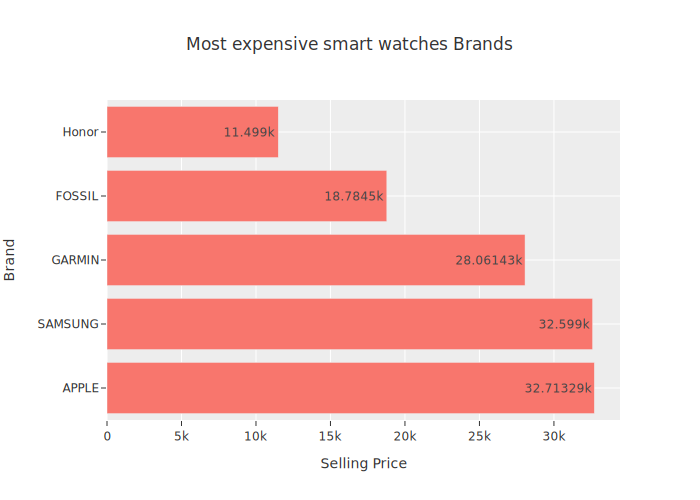

In [16]:
fig4=px.bar(exsmw,x='Selling Price',template='ggplot2',title="Most expensive smart watches Brands",text_auto=True,orientation='h')
fig4.show(renderer="svg")

In [17]:
sm.head()

,Name,Brand,Selling Price,MRP,Discount,Ratings,No_of_ratings,Details
0,Noise ColorFit Caliber Go with 1.69 inch HD Di...,Noise,1999,3999,50,4.2,18966,"[""1.69'' TFT display (240*280px 500 nits 218 P..."
1,boAt Storm Pro Call with Bluetooth Calling 1.7...,boAt,3299,9799,66,4.1,9288,"['Bluetooth Calling with Dial Pad' ""1.78'' AMO..."
2,Noise ColorFit Caliber Smart Watch with 15-day...,Noise,1499,3999,62,4.2,243784,"['4.2 cm (1.69"") LCD full touch screen' '150+ ..."
3,Noise ColorFit Icon 2 1.8 Display Bluetooth Ca...,Noise,2199,5999,63,4.2,47184,['1.8 display (500 nits brightness)| Bluetooth...
4,"Noise Icon Buzz BT Calling with 1.69"" display ...",Noise,1999,4999,60,4.2,169101,['1.69 TFT LCD Display' 'In-Built Games|Blueto...


In [18]:
#Here specs are in brackets(can use regex to extract specs), for processors we can use values either starting with core or ryzen
#import re
#l5=[]
#for i in lp['Name']:
#    i = re.finditer("Core.+-", str(lp['Name']))
#    l5.append(list(i))
#l5

#output = []
#for x in l5:
#    if x not in output:
#        output.append(x)
#len(output)
#len(pd.DataFrame(output))

# Washing Machine Analysis

In [19]:
wm.duplicated().sum()

0

In [23]:
#wm=wm.drop_duplicates()# wont work coz of differert items coombine same ratings

In [29]:
Top5wm=pd.pivot_table(wm,index='Name',values=['Ratings','No_of_ratings'])
Top5wm=Top5wm.sort_values(by=['No_of_ratings'],ascending=False)
Top5wm=Top5wm[Top5wm['Ratings']>4.0].head(12)
Top5wm=Top5wm.drop_duplicates()
Top5wm

,No_of_ratings,Ratings
Name,,
SAMSUNG 6.5 kg 5 Star Inverter with Diamond Drum Fully Automatic Top Load Grey,73967.0,4.4
Whirlpool 6 kg 5 StarTurbo Scrub Technology Semi Automatic Top Load Grey,66571.0,4.4
MarQ by Flipkart 6.5 kg 5 Star Rating Semi Automatic Top Load White Blue,53562.0,4.3
ONIDA 7 kg with 5 Star Fully Automatic Top Load Grey,43250.0,4.2
Whirlpool 7 kg with Hard Water Wash Fully Automatic Top Load Grey,30745.0,4.3


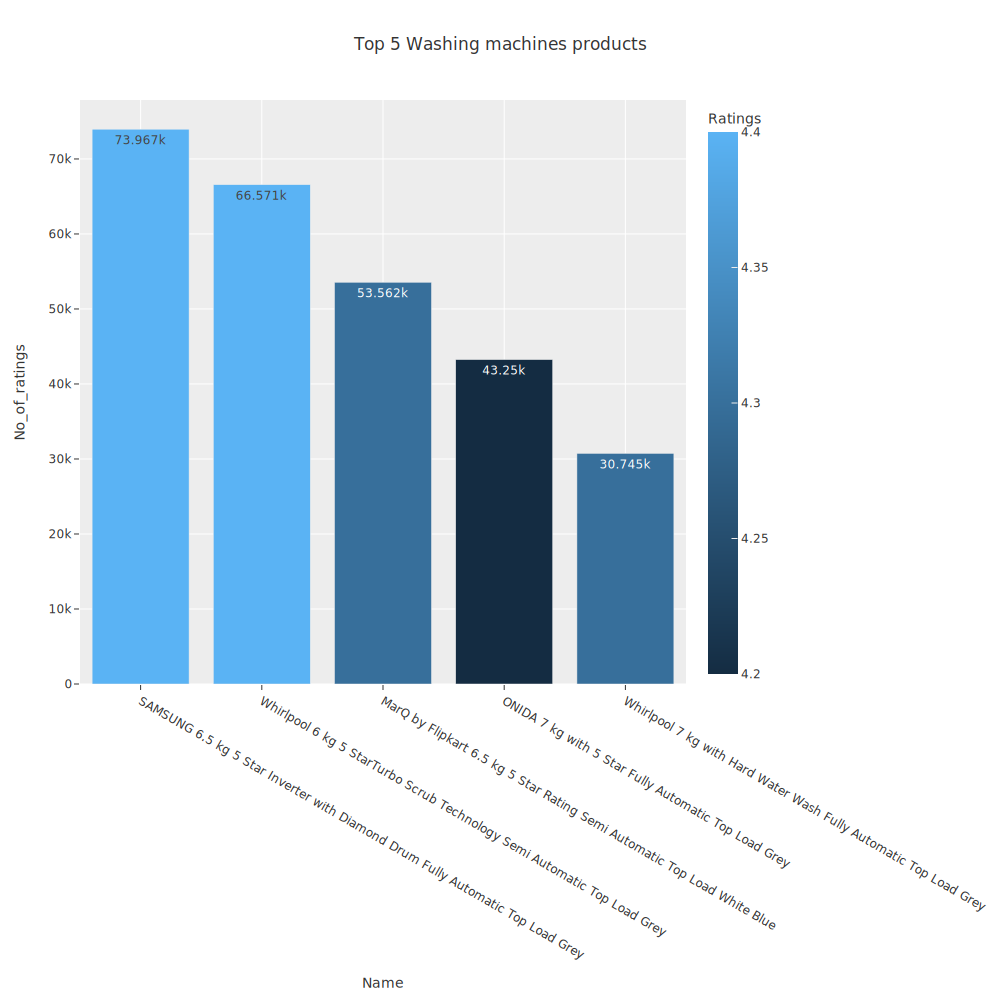

In [30]:
fig5=px.bar(Top5wm,y='No_of_ratings',color='Ratings',template='ggplot2',height=1000,width=1000,title="Top 5 Washing machines products",text_auto=True)
fig5.show(renderer="svg")

In [31]:
diswm=pd.pivot_table(wm,index='Name',values=['Discount'])
diswm=diswm.sort_values(by=['Discount'],ascending=False)
diswm=diswm.head(5)
diswm

,Discount
Name,
realme TechLife 8 kg 5 Star Smart Wi-Fi Enabled Inverter Technology Garment Sterilization Fully Automa...,46.0
Voltas Beko 9 kg Fully Automatic Top Load Grey,44.0
realme TechLife 8.5 kg with Semi Automatic Top Load Grey Black,43.0
BOSCH 7 kg Semi Automatic Top Load Grey,43.0
White Westinghouse (Trademark by Electrolux) 10.5 kg Fully Automatic Front Load with In-built Heater W...,43.0


In [33]:
exwm=pd.pivot_table(wm,index='Brand',values=['Selling Price'])
exwm=exwm.sort_values(by=['Selling Price'],ascending=False,)
exwm=exwm.head(5)
exwm

,Selling Price
Brand,
Samsung,109090.000000
IFB,31107.764706
BOSCH,30383.318182
Galanz,27823.333333
LG,25701.777778


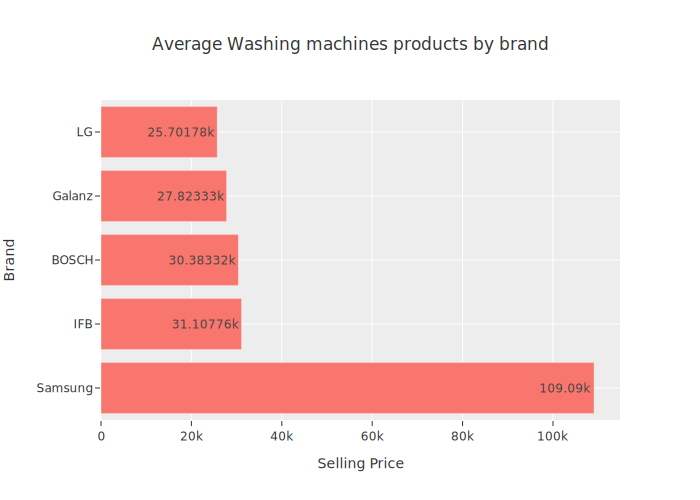

In [34]:
fig7=px.bar(exwm,x='Selling Price',template='ggplot2',title="Average Washing machines products by brand",text_auto=True,orientation='h')
fig7.show(renderer="svg")

# TV Analysis

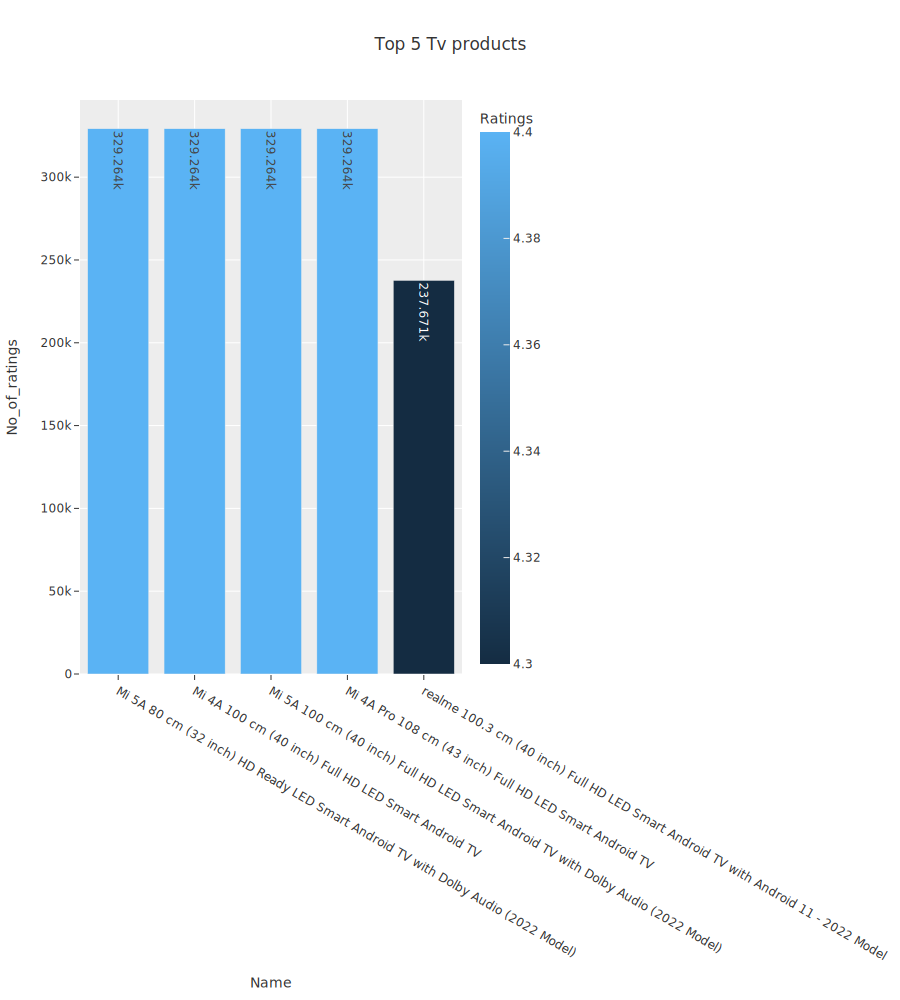

In [35]:
Top5tv=pd.pivot_table(tv,index='Name',values=['Ratings','No_of_ratings'])
Top5tv=Top5tv.sort_values(by=['No_of_ratings'],ascending=False)
Top5tv=Top5tv[Top5tv['Ratings']>4.1].head(5)
fig8=px.bar(Top5tv,y='No_of_ratings',color='Ratings',template='ggplot2',height=1000,width=900,title="Top 5 Tv products",text_auto=True)
fig8.show(renderer="svg")

In [36]:
extv=pd.pivot_table(tv,index='Brand',values=['Selling Price'])
extv=extv.sort_values(by=['Selling Price'],ascending=False,)
extv=extv.head(5)

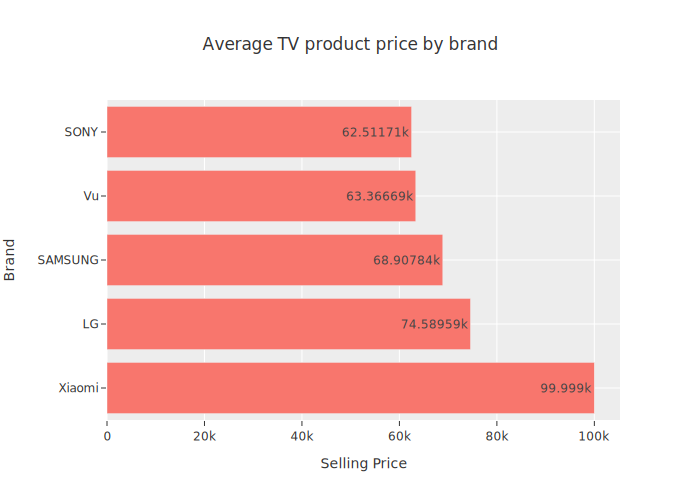

In [37]:
fig9=px.bar(extv,x='Selling Price',template='ggplot2',title="Average TV product price by brand",text_auto=True,orientation='h')
fig9.show(renderer="svg")

# Refridgerator Analysis

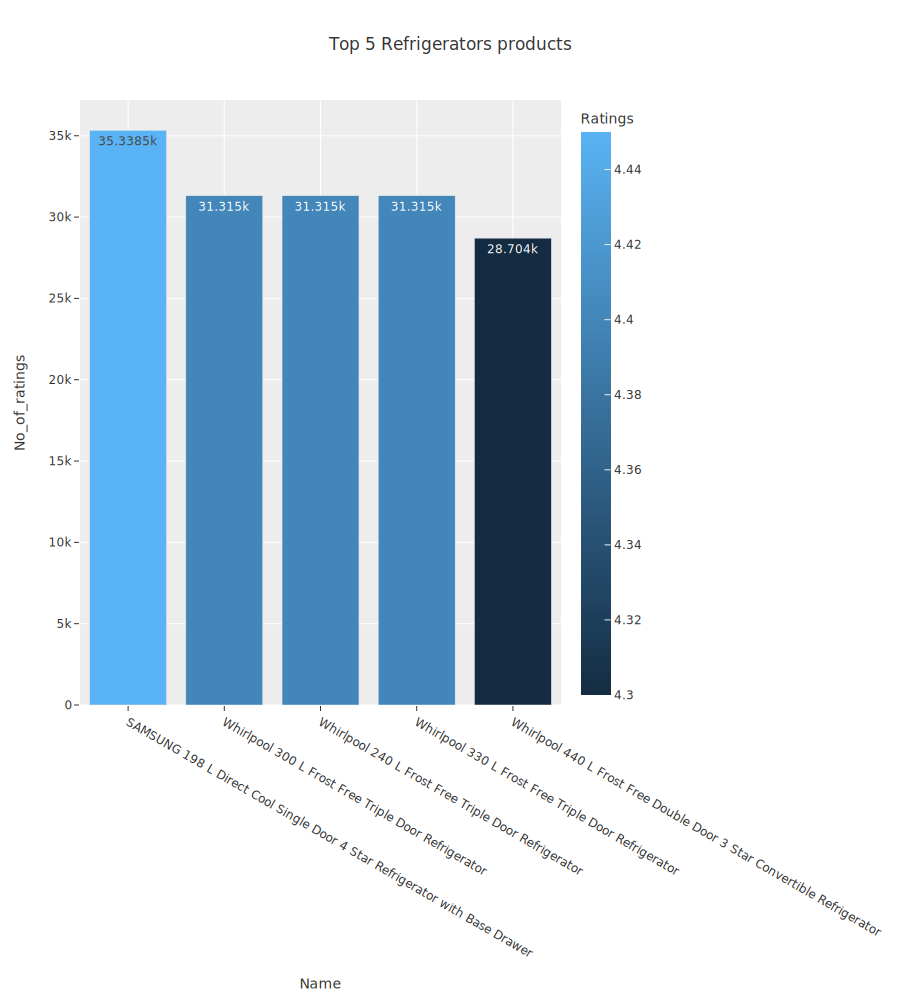

In [38]:
Top5ref=pd.pivot_table(ref,index='Name',values=['Ratings','No_of_ratings'])
Top5ref=Top5ref.sort_values(by=['No_of_ratings'],ascending=False)
Top5ref=Top5ref[Top5ref['Ratings']>4.0].head(5)
fig10=px.bar(Top5ref,y='No_of_ratings',template='ggplot2',color='Ratings',height=1000,width=900,title="Top 5 Refrigerators products",text_auto=True)
fig10.show(renderer="svg")

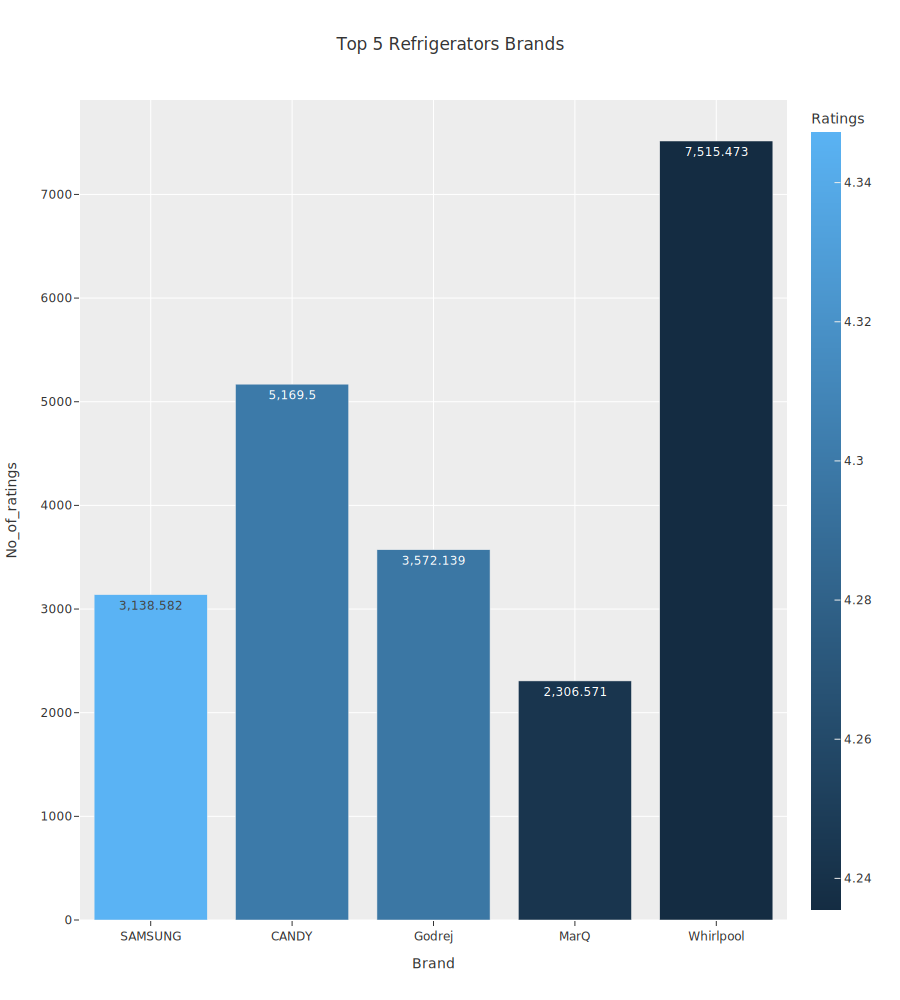

In [39]:
brandref=pd.pivot_table(ref,index='Brand',values=['Ratings','No_of_ratings'])
brandref=brandref.sort_values(by=['Ratings'],ascending=False,)
brandref=brandref[brandref['No_of_ratings']>2000].head(5)
fig11=px.bar(brandref,y='No_of_ratings',template='ggplot2',color='Ratings',height=1000,width=900,title="Top 5 Refrigerators Brands",text_auto=True)
fig11.show(renderer="svg")

# Mobile Analysis

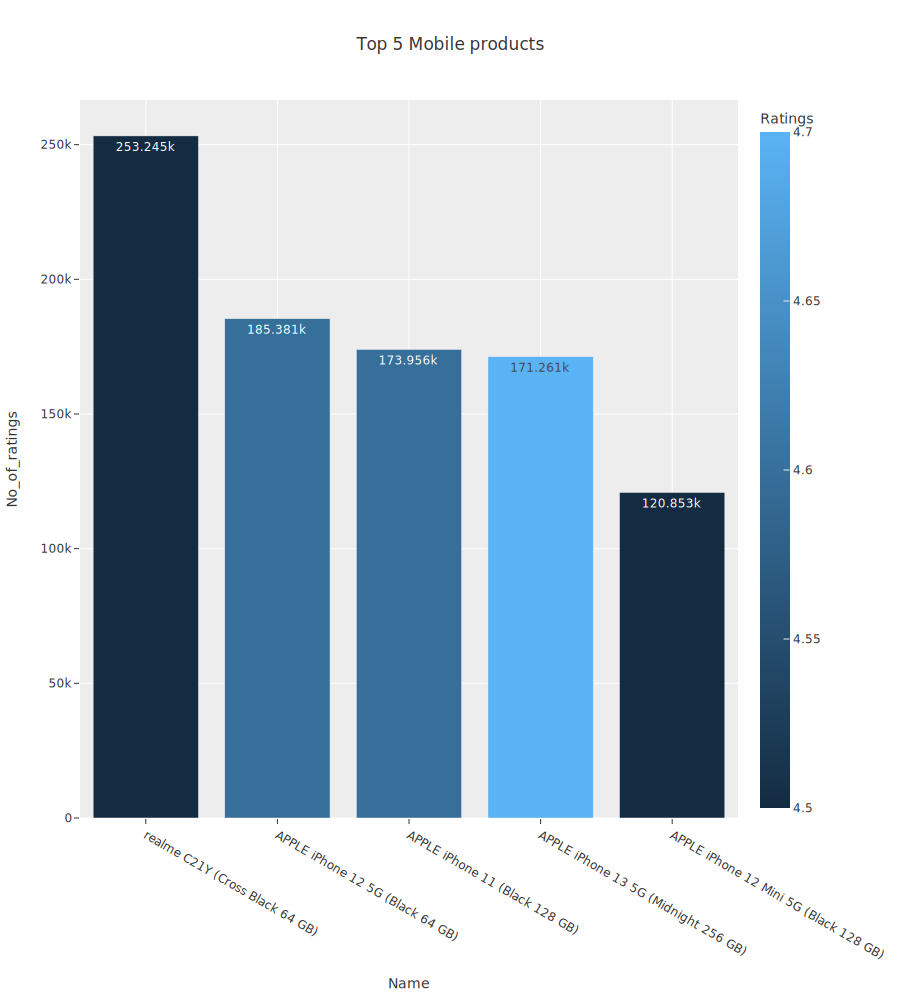

In [41]:
Top5mob=pd.pivot_table(mb,index='Name',values=['Ratings','No_of_ratings'])
Top5mob=Top5mob.sort_values(by=['No_of_ratings'],ascending=False)
Top5mob=Top5mob.drop_duplicates()
Top5mob=Top5mob[Top5mob['Ratings']>4.4].head(5)
fig12=px.bar(Top5mob,y='No_of_ratings',color='Ratings',template='ggplot2',height=1000,width=900,title="Top 5 Mobile products",text_auto=True)
fig12.show(renderer="svg")

In [42]:
mb['Brand']=mb['Brand'].str.replace('realme','Realme')

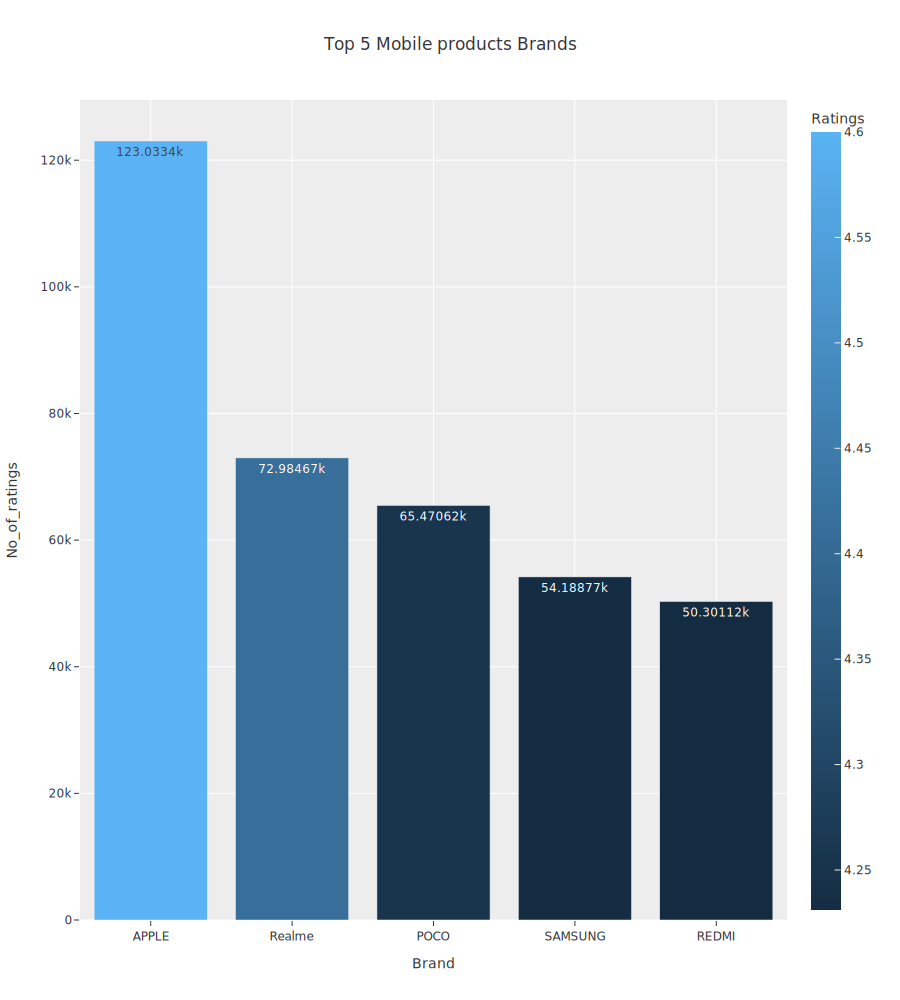

In [43]:
brandmob=pd.pivot_table(mb,index='Brand',values=['Ratings','No_of_ratings'])
brandmob=brandmob.sort_values(by=['Ratings'],ascending=False,)
brandmob=brandmob[brandmob['No_of_ratings']>30000].head(5)
fig13=px.bar(brandmob,y='No_of_ratings',template='ggplot2',color='Ratings',height=1000,width=900,title="Top 5 Mobile products Brands",text_auto=True)
fig13.show(renderer="svg")

In [44]:
Top5lp=pd.pivot_table(lp,index='Name',values=['Ratings','No_of_ratings'])
Top5lp=Top5lp.sort_values(by=['No_of_ratings'],ascending=False)
Top5lp=Top5lp[Top5lp['Ratings']>4.1].head(5)
Top5lp

,No_of_ratings,Ratings
Name,,
acer Predator Helios 300 Core i5 8th Gen - (8 GB/1 TB HDD/128 GB SSD/Windows 10 Home/4 GB Graphics/NVI...,13095.0,4.6
realme Book (Slim) Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin and Light Laptop,11894.0,4.4
ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-BQ322WS Thin and L...,8727.0,4.3
ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,8727.0,4.3
APPLE MacBook Air M1 - (8 GB/512 GB SSD/Mac OS Big Sur) Z12400092,8401.0,4.7


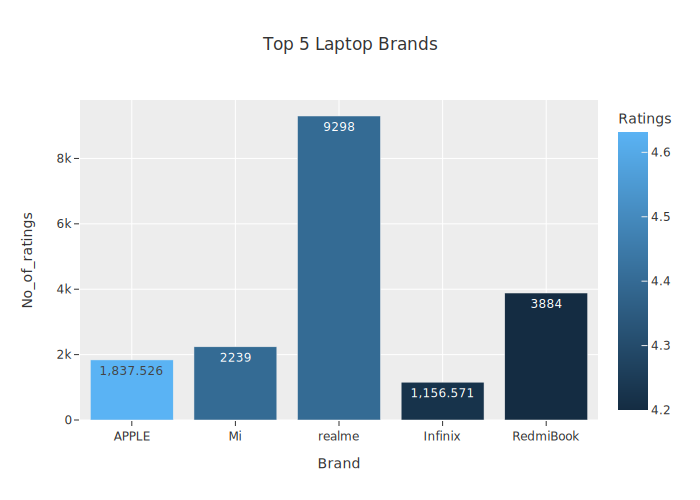

In [46]:
brandlp=pd.pivot_table(lp,index='Brand',values=['Ratings','No_of_ratings'])
brandlp=brandlp[brandlp['No_of_ratings']>1100].head(5)
brandlp=brandlp.sort_values(by=['Ratings'],ascending=False)
fig14=px.bar(brandlp,y='No_of_ratings',template='ggplot2',color='Ratings',title="Top 5 Laptop Brands",text_auto=True)
fig14.show(renderer="svg")

# All Products Analysis

In [48]:
df = pd.concat([wm,sm,lp,tv,ref,mb], ignore_index=True, sort=False)

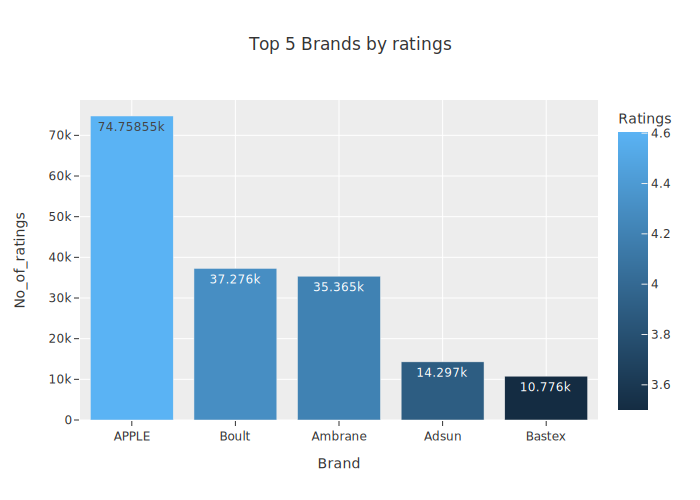

In [49]:
brand=pd.pivot_table(df,index='Brand',values=['Ratings','No_of_ratings'])
brand=brand[brand['No_of_ratings']>10000].head(5)
brand=brand.sort_values(by=['Ratings'],ascending=False)
fig15=px.bar(brand,y='No_of_ratings',color='Ratings',template='ggplot2',title="Top 5 Brands by ratings",text_auto=True)
fig15.show(renderer="svg")

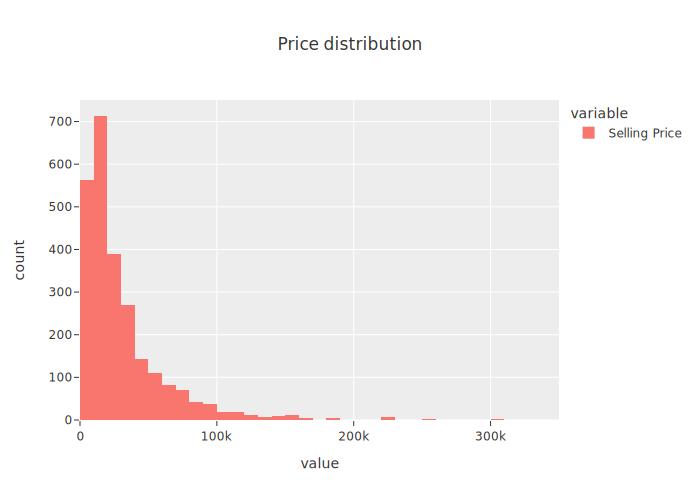

In [50]:
fig16=px.histogram(df['Selling Price'],nbins=45,template='ggplot2',title='Price distribution')
fig16.show(renderer="svg")

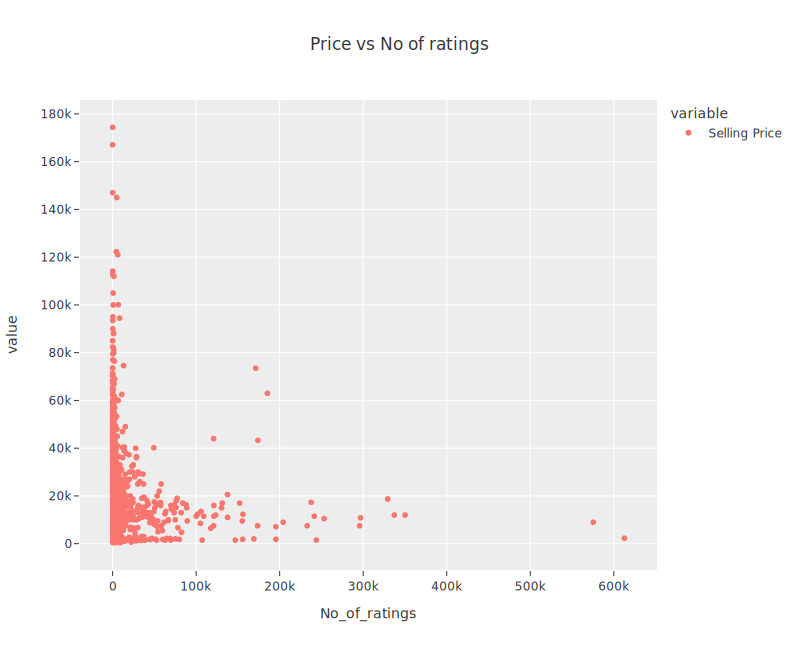

In [51]:
pr=pd.pivot_table(df,index='No_of_ratings',values='Selling Price',aggfunc='mean')
fig17=px.scatter(pr,template='ggplot2',title='Price vs No of ratings',height=650,width=800)
fig17.show(renderer="svg")

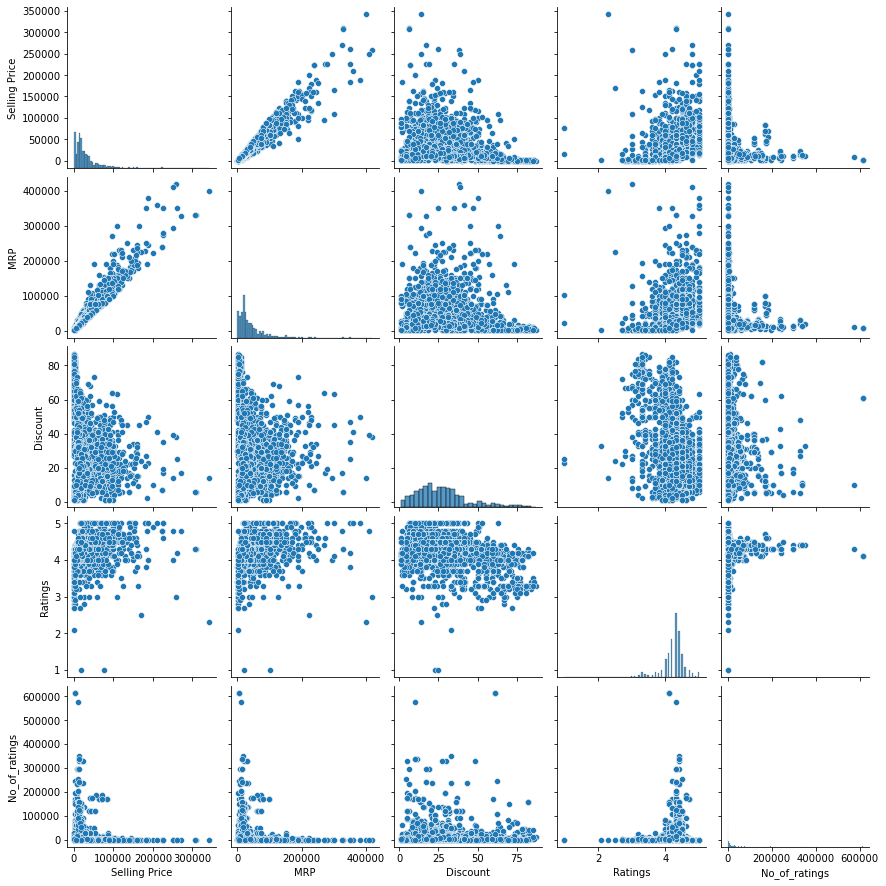

In [52]:
sns.pairplot(df)

<AxesSubplot:>

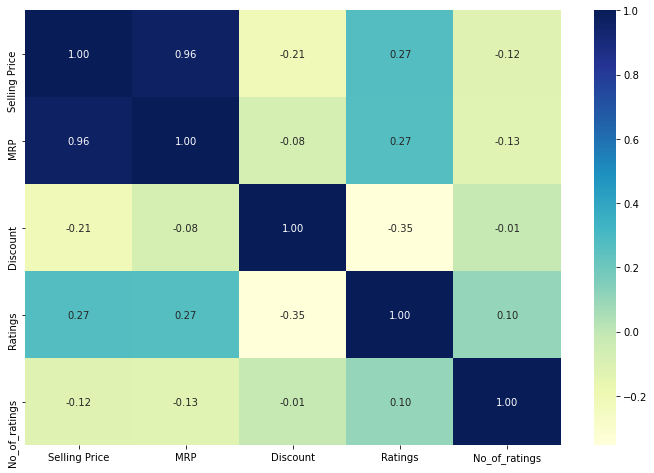

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

In [54]:
df.info(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           2525 non-null   object 
 1   Brand          2525 non-null   object 
 2   Selling Price  2525 non-null   int64  
 3   MRP            2525 non-null   int64  
 4   Discount       2525 non-null   int32  
 5   Ratings        2525 non-null   float64
 6   No_of_ratings  2525 non-null   int32  
 7   Details        2525 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 138.2+ KB
